**<center><font color='#023F7C' size="6.5">Course 3: Machine Learning </font>** <br>
<font color=#023F7C size=4>**Hi!ckathon #5 - AI & Sustainability**</font> <br>
<font color=#023F7C size=2> 6:15PM-8:00PM </font> <br>

<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

</center>

<font color="#023F7C">**Authors**:</font> 
- **Hadrien Mariaccia**, Research Machine Learning Engineer @ Hi! PARIS <br>
-  **Gaëtan Brison**, Research Machine Learning Engineer Manager @ Hi! PARIS <br>
-  **Thibault Porssut**, Research Machine Learning Engineer @ Hi! PARIS <br>

➡️ https://github.com/hi-paris ⭐️

## Machine Learning : a short definition

<h5>
Machine Learning is a branch of AI that empowers computers to improve task performance by learning from data using algorithms and statistical models, <br> enabling them to make predictions or decisions without explicit programming.

## **Machine Learning, problem typology overview**

<center>
<img src = https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9G8g2xvaqGFJMPPGqLIlrQ.jpeg width=500>

A good methodology to solve any problem is to relevently classify what is the type of the problem we want to solve.

In Machine Learning, there's different class of models, each to be applied in specific use cases :

- **Classical Machine Learning**:

    - **Supervised Learning**: Trains a model on labeled data to learn the mapping between input and output, aiming for accurate predictions on new data.


    - **Unsupervised Learning**: Involves algorithms analyzing unlabeled data to discover patterns or relationships, with common tasks including clustering and dimensionality reduction.


- **Ensemble Learning**: Involves combining predictions from multiple models to enhance overall performance, leveraging the strengths and diversity of individual models.

- **Reinforcement Learning**: Focuses on an agent learning decision-making through interactions with an environment. The agent receives feedback in the form of rewards or penalties to learn optimal strategies over time.


- **Deep Learning**: A subfield of machine learning that concentrates on neural networks with multiple layers, known as deep neural networks, enabling automatic learning of complex hierarchical representations.

<h4>Today's session is dedicated to <strong>Supervised Learning </strong> and <strong>Ensemble Learning </strong>



## **Today's Agenda** 🗣️

#### **Presentation of the use case** <br>

For today's course, we will use the dataset of **6000 spotify tracks cleaned and preprocessed** during the first course on **Feature Engineering**<br>

The dataset is already split in a train / test part.

Our use case is a **supervised learning** use case as we have labelled data

#### **Agenda** <br>

The goal of today's session will be to:

1. Present **classification** models applied to the **prediction of the genre of a track** (6 different genres)
2. Present **regression** models applied to the **prediction of the popularity of a track**
3. Give some bibliography resources about **Time Series**

#### **What we won't do** <br>

1. Cover deep mathematical aspects of every algorithm
2. Cover every classification and regression models
3. Cover time series topic deeply
4. Cover explainability methods and tools as it's the purpose of a further session

## **Classification algorithms to predict the genre of a track** 🏷️

Our first use case is a **multi-class classification use case** as there's 6 different track genres. <br>

<center>
<img src = https://media.geeksforgeeks.org/wp-content/uploads/20200702103829/classification1.png width=500>
</center>

Almost every classification algorithm can be used for both binary and multi-class classification, but their performance are not the same depending on if it's a binary or multi-class classification.

As this course has the ambition to cover the maximum number of machine learning concepts, and to do it by trying to give both key pratical and theoritical takeaways in the minimum amount of time : <br>

**We won't cover every existing models**.


In this section we will use and lightly deep dive into the following algorithms / models :

1. K-Neirest Neighbors (KNN)
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. XGBoost

For each algorithm, we will use the following methodology :

1. Slightly deep dive into the theory and show an explicit visualisation of how it works
2. Discuss some of the hyperparameters of the algorithm
3. Execute it using scikit-learn
4. Show the accuracy of the algorithm on the test set

Then, we will compare and evaluate these models using different **evaluation metrics** :

1. Accuracy
2. Confusion Matrix
3. Cross-Validation
4. Precision, Recall, F1 Score

Finally, we will introduce **GridSearch** algorithm for **hyperpameter tuning**.

### Dataset description reminder

As a reminder, here's the description of each column of the dataset. <br>

| Column | Description |
| ------ | ------------ |
| **artists** | **The artists' names who performed the track, this column is one hot encoded <br> into 7 columns, one for each 6 top artists and one for an other artists column** |
| **popularity** | The popularity of a track is a value between 0 and 100.
| **duration_ms** | The track length in milliseconds |
| **explicit** | **Whether or not the track has explicit lyrics, this column is one hot encoded <br> into 2 columns, for True and False respectively** |
| **danceability** | Danceability describes how suitable a track is for dancing |
| **energy** | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of <br> intensity and activity
| **key** | **The key the track is in. Integers map to pitches using standard Pitch Class notation, <br> this column is one hot encoded into 12 columns, one for each key**|
| **loudness** | The overall loudness of a track in decibels (dB) |
| **mode** | Mode indicates the modality (major or minor) of a track (major=1, minor=0) |
| **speechiness** | Speechiness detects the presence of spoken words in a track |
| **acousticness** | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. |
| **instrumentalness** | Predicts whether a track contains no vocals |
| **liveness** | Detects the presence of an audience in the recording|
| **valence** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track |
| **tempo** | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology |
| **time_signature** | An estimated time signature. The time signature (meter) is a notational <br> convention to specify how many beats are in each measure. |
| **track_genre** | The genre in which the track belongs, this is the class to be predicted |

### Data import

We use the data preprocessed for classification during last session.

It's already split into a train and a test set.

In [2]:
import pandas as pd
df_train = pd.read_csv("CoursML_Classification_train.csv")
df_test = pd.read_csv("CoursML_Classification_test.csv")

In [5]:
# Splitting into X and y variables
X_train = df_train.drop("genre", axis=1)
y_train = df_train["genre"]

X_test = df_test.drop("genre", axis=1)
y_test = df_test["genre"]

**Why do we split the detaset into a train and a test set ?**

In [6]:
X_train.head()

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_9,key_10,key_11,artists_Dean Martin,artists_Ella Fitzgerald,artists_Feid,artists_J Balvin,artists_Nat King Cole,artists_Other,artists_Wolfgang Amadeus Mozart
0,1.451302,-0.733413,1.803416,0.343162,0.470137,0,2.419611,-0.921904,-0.610084,1.370101,...,0,0,1,0,0,0,0,0,1,0
1,-1.017717,-1.088821,-1.154433,-0.460833,-0.270538,1,-0.317630,1.261715,-0.610081,0.167557,...,0,0,0,0,0,0,0,0,1,0
2,-0.817526,2.205278,-0.701081,-2.002677,-3.860069,1,0.072185,1.628842,1.949865,-0.616011,...,0,0,0,0,0,0,0,0,0,1
3,-1.017717,-0.707367,-0.402531,-1.826571,-1.746859,1,-0.260723,1.628842,1.885376,-0.629798,...,0,0,0,0,0,0,0,0,1,0
4,-0.050128,-0.594958,1.200789,1.133113,0.688987,0,2.007033,-0.890698,-0.610084,-0.635926,...,1,0,0,0,0,0,0,0,1,0


In [7]:
print(X_train.shape[0])
print(X_test.shape[0])

4339
1085


**X_train has numerical features only**

In [8]:
y_train.unique()

array(['latino', 'jazz', 'classical', 'techno', 'pop', 'metal'],
      dtype=object)

### Scikit-Learn library (as you may already know it)

**Scikit-learn (Sklearn) is the most useful and robust open-source library for machine learning in Python**. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

In this notebook, we will use scikit-learn by default.

### Reminder on the **biais-variance tradeoff**

The bias-variance tradeoff is the balance between the model's ability to fit the training data accurately (low bias) and its ability to generalize to new, unseen data (low variance).

- **Bias** refers to the error introduced by approximating a real-world problem, which may be complex, by a simple model. **High bias can lead to underfitting**, where the model is too simplistic and fails to capture the underlying patterns in the data.

- **Variance** is the model's sensitivity to small fluctuations in the training data. **High variance can lead to overfitting**, where the model performs well on the training data but fails to generalize to new data because it has essentially memorized the training set.

The tradeoff occurs because **decreasing bias often increases variance, and vice versa**. The goal is to find the right balance that minimizes both bias and variance, resulting in a model that generalizes well to new data. This is crucial for creating models that perform well in real-world scenarios. Techniques like cross-validation, regularization, and choosing appropriate **hyperparameters** help manage the bias-variance tradeoff.

<center>
<img src = https://fr.mathworks.com/discovery/overfitting/_jcr_content/mainParsys/image.adapt.full.medium.svg/1679493630702.svg width=500>
</center>



**Overfitting** can be observed by comparing the accuracy on the test set and the accuracy on the training set. A model overfits when the accuracy on the training set is close to 100% but the accuracy on the test set is significantly lower.

### **K-Nearest Neighbors (KNN)**

#### Model overview

You must have heard of KNN as it is probably the most intuitive classification algorithm.

KNN consists in classifying each new datapoint as the most represented class among its $k$ nearest neighbors, $k$ being a hyperparameter of the model.
<center>
<img src = https://miro.medium.com/v2/resize:fit:1400/format:webp/1*3SwcOCUyVdGauhHrHvOaLA.png width=600>

#### Hyperparameters
- $n\_neighbors$ : number of neighbors, as we have $6$ classes, $k=7$ ensures to have a defined class.

- $weights$ : Weight function used in prediction. Default value is 'uniform'. Possible values:
    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    

- $metric$ : Metric to use for distance computation. Default is “minkowski” (l2). Some possible values :
    - ‘manhattan’
    - ‘nan_euclidean’
    - ‘cosine’

We keep distance to its default value as we have numerical features.

See [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more details

#### Model execution

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Accuracy

In [10]:
knn.score(X_test, y_test)

0.7649769585253456

**What would happen if we set a very high number for $n\_neighbors$ (for example a number close to the size of the training set) ?**

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=4000)
knn_2.fit(X_train, y_train)
knn_2.score(X_test, y_test)


0.2847926267281106

### **Logistic Regression**

#### Model overview
<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Exam_pass_logistic_curve.svg/609px-Exam_pass_logistic_curve.svg.png width=500>

Logistic regression is a very known classification algorithm, **used mainly for binary classification** but it can also be used for **multi-class classification**.

The logistic regression works as follow :

1. Compute a "linear" model using randomly initialized weights (the weights being a vector for binary classification and a matrix for multi-class classification)
2. Compute the logit of this linear model using sigmoid function for binary classification or softmax function for multi-class classification, softmax being defined as follow:
$$ \text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)} $$
3. Compute the loss using the negative log-likelihood which happens to be a convex function with a minimum.
4. Minimise the loss and update the weights by solving the equation :
$$\frac{\partial \ell}{\partial \beta_i} = 0$$
with $\beta_i$ being either the $i^{th}$ value of the weights vector for binary classification of the $i^{th}$ vector of weights for multi-class classification

#### Hyperparameters
- $max\_iter$ : Maximum number of iterations taken for the solvers to converge. default=100. We choose $max\_iter = 200$ as our dataset is relatively large

See [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more details

#### Model execution

In [9]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=200)
logistic_regression.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


#### Accuracy

In [10]:
logistic_regression.score(X_test, y_test)

0.7566820276497696

### **Decision Tree**

#### Model overview

A decision tree is also a very known tool for classification (both binary and multi-class).

It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

During training, the Decision Tree algorithm selects the best attribute to split the data based on a metric such as **entropy** or **Gini impurity**, which measures the level of randomness in the subsets. The goal is to find the attribute that maximizes the **information gain** after the split. For example, using the entropy :

Entropy formula for a dataset with $N$ classes is : $$ E = - \sum_{i=1}^{N}p_{i}\log_{2}p_i$$

The Information Gain formula of a specific split in a tree can defined as follow :
$$ IG = E(parent) - \frac{1}{C}\sum_{j=1}^{C}E(j)$$
with
- $C$ the number of children
- $j$ the $j^{th}$ child

<center>
<img src = https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg width=400>

#### Hyperparameters
- $criterion$ : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
- $max\_depth$ : max dept of the tree

See [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details

#### Model execution

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Random_state controls the randomness of the estimator
# Set this to a fixed value to have exactly the same results for every execution
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=0)
decision_tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Accuracy

In [15]:
decision_tree.score(X_test, y_test)

0.7972350230414746

In [16]:
decision_tree.score(X_train, y_train)

0.860106015210878

**What would if we use a very high number for $max\_depth$ ?**

In [17]:
decision_tree_2 = DecisionTreeClassifier(criterion="entropy", max_depth=100)
decision_tree_2.fit(X_train, y_train)

print(str(decision_tree_2.score(X_train, y_train)))
print(str(decision_tree_2.score(X_test, y_test)))

0.9912422217100715
0.8073732718894009


#### Tree Visualisation

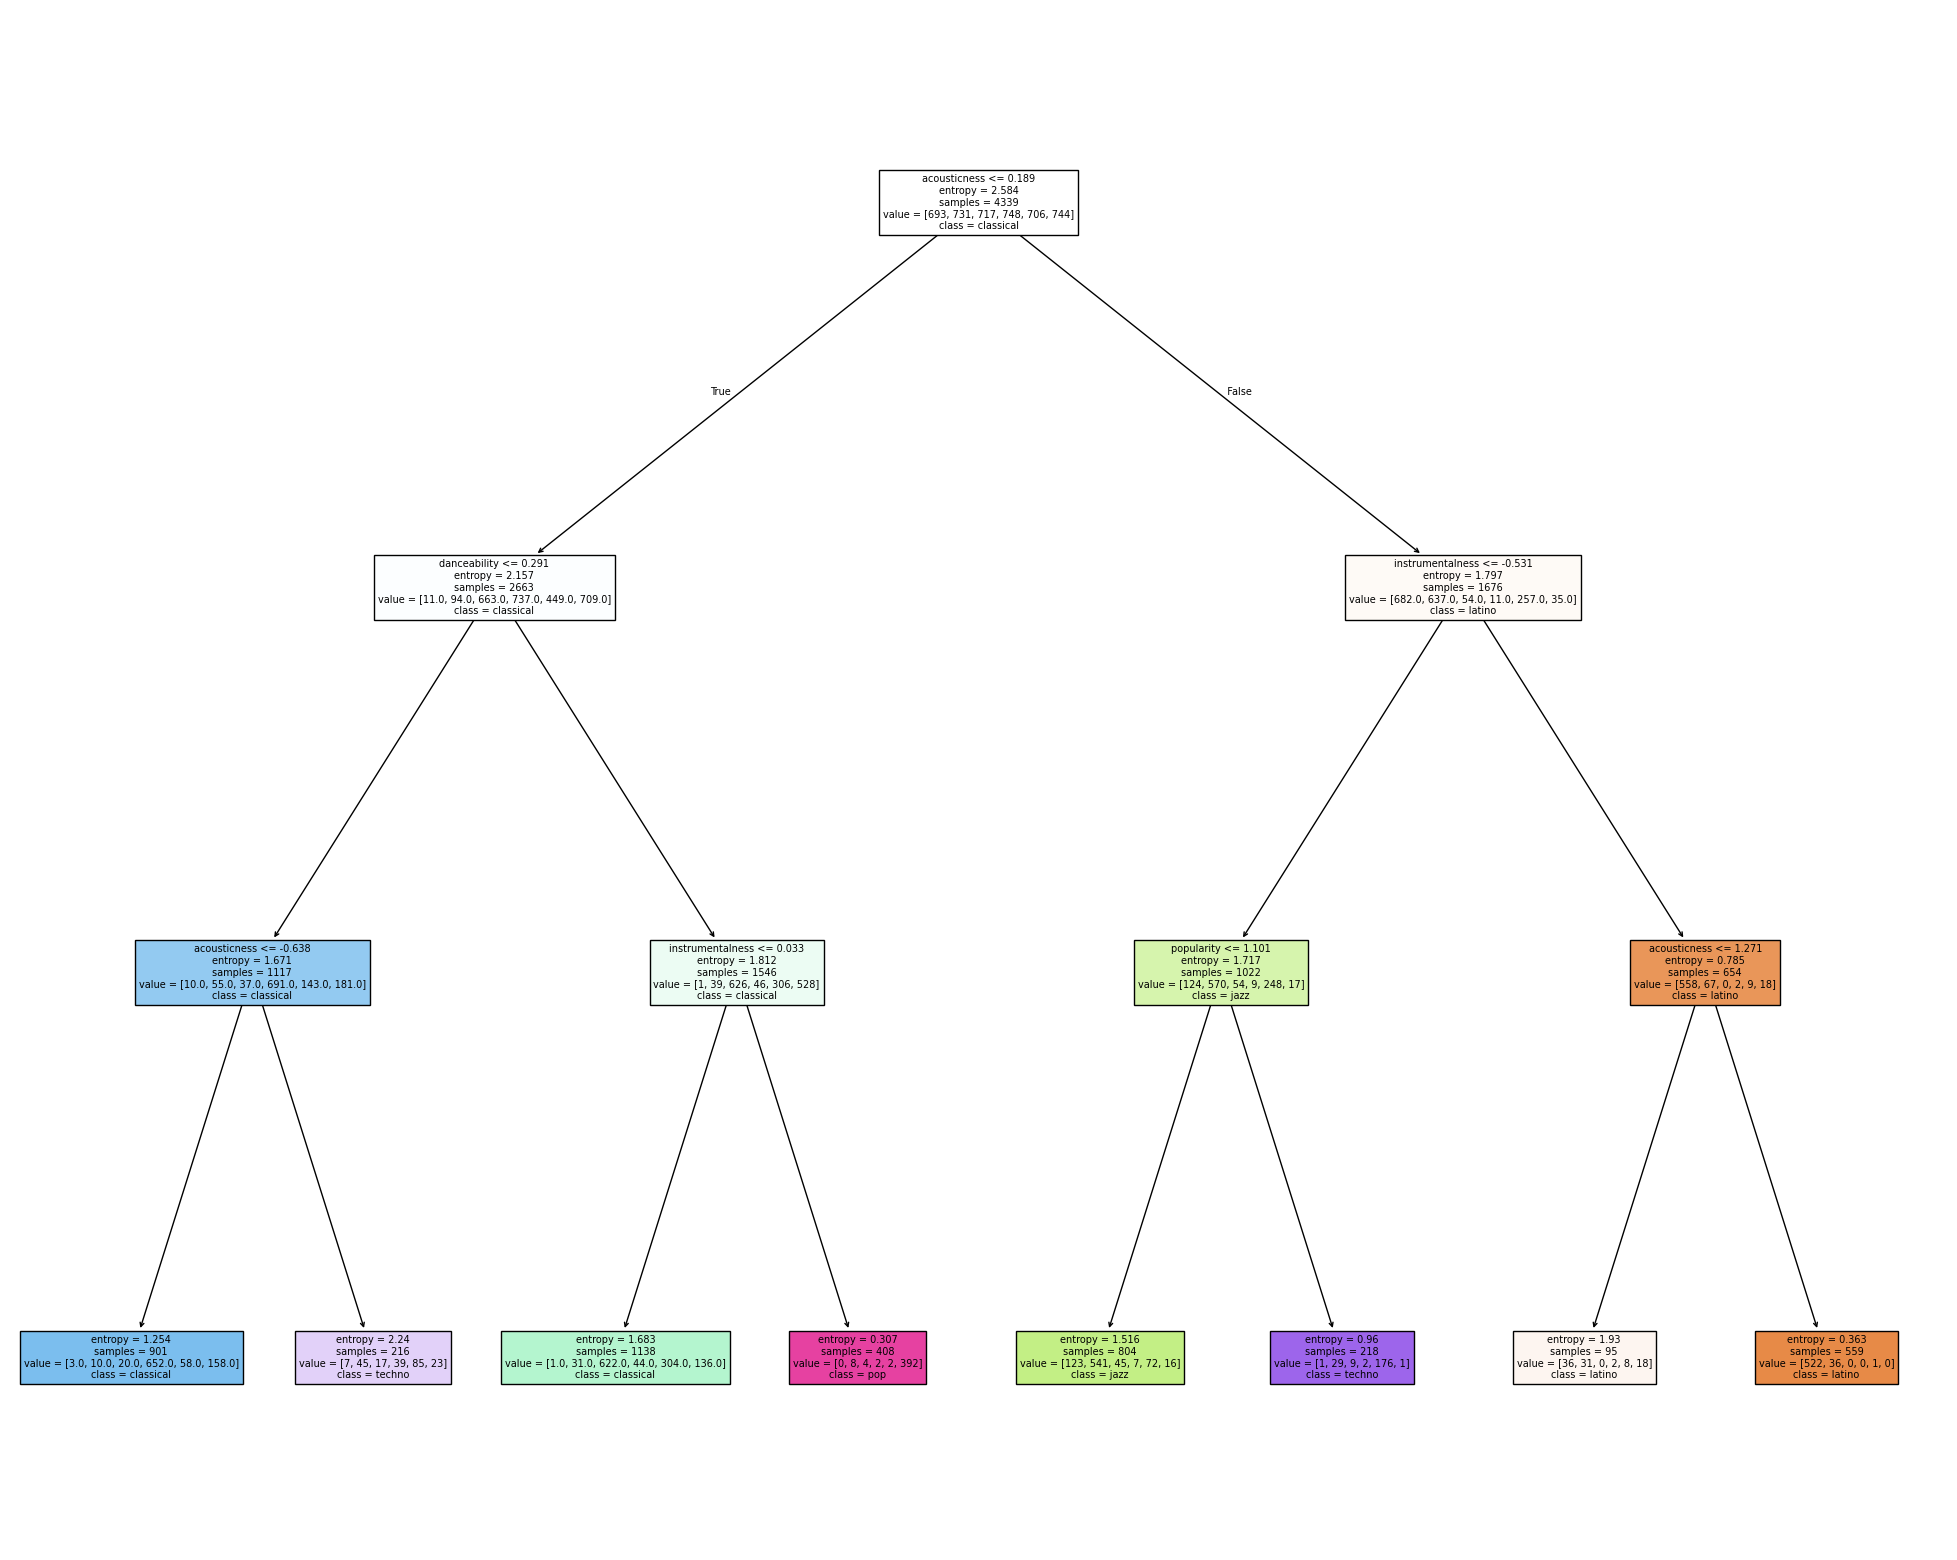

In [22]:
from matplotlib import pyplot as plt
from sklearn import tree

decision_tree_vis = DecisionTreeClassifier(criterion="entropy", max_depth=3)
decision_tree_vis.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_vis,
                   feature_names=X_train.columns,
                   class_names=y_train,
                   filled=True)

In [19]:
print(str(decision_tree_vis.score(X_train, y_train)))
print(str(decision_tree_vis.score(X_test, y_test)))

0.6973957132979949
0.687557603686636


### **Random Forest**

#### Model overview

The training algorithm for random forests applies the general technique of **bootstrap aggregating**, or **bagging** (which a subpart of **ensemble methods**), to tree learners.
Given a training set $X = x_1,...,x_n$ with responses $Y = y_1,...,y_n$ , bagging repeatedly (*B* times) selects a random sample with replacement of the training set and fits trees to these samples:

For $b = 1,...,B$ :
1. Sample, with replacement, training examples from $X, Y$; call these $X_b, Y_b$
2. Train a classification or regression tree $f_b$ on $X_b, Y_b$

After training, predictions for unseen samples can be made by averaging
the predictions from all the individual regression trees on $x'$:

$$\hat{f} = \frac{1}{B} \sum_{b=1}^{B} f_b (x')$$

or **by taking the plurality vote** in the case of **classification trees**.


For example, with a dataset of $250$ rows and $100$ columns :
<center>
<img src= https://upload.wikimedia.org/wikipedia/commons/e/e3/Random_Forest_Bagging_Illustration.png width=500>

#### Hyperparameters

- $n\_estimators$ : the number of trees in the forest, default = $100$
- $criterion$ : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
- $max\_depth$ : max dept of the trees

See [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details

#### Model execution

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion="entropy", n_estimators=150, max_depth=15)
random_forest.fit(X_train, y_train)

,n_estimators,150
,criterion,'entropy'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Accuracy

In [24]:
random_forest.score(X_test, y_test)

0.8599078341013825

### **XGBoost**

<center>
<img src= https://media.geeksforgeeks.org/wp-content/uploads/20250903173429506712/des.webp width=500>

### Model overview

"XGBoost, which stands for **Extreme Gradient Boosting**, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

A Gradient Boosting Decision Trees (GBDT) is a decision tree **ensemble learning algorithm** similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model.

Both random forest and GBDT build a model consisting of multiple decision trees. **The difference is in how the trees are built and combined**.

The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a **collectively strong model**. Gradient boosting is an extension of boosting where the process of additively generating weak models is formalized as a gradient descent algorithm over an objective function. Gradient boosting sets targeted outcomes for the next model in an effort to minimize errors. Targeted outcomes for each case are based on the gradient of the error (hence the name gradient boosting) with respect to the prediction.

GBDTs iteratively train **an ensemble of shallow decision trees, with each iteration using the error residuals of the previous model to fit the next model**. The final prediction is a weighted sum of all of the tree predictions. **Random forest “bagging” minimizes the variance and overfitting, while GBDT “boosting” minimizes the bias and underfitting**.

XGBoost is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed. With XGBoost, **trees are built in parallel**, instead of sequentially like GBDT. It follows a level-wise strategy, scanning across gradient values and using these partial sums to evaluate the quality of splits at every possible split in the training set."

source : https://www.nvidia.com/en-us/glossary/data-science/xgboost/

<center>
<img src = https://www.researchgate.net/profile/Li-Mingtao-2/publication/335483097/figure/fig3/AS:934217085100032@1599746118459/A-general-architecture-of-XGBoost.ppm width=500>

#### Hyperparameters

- $booster$ : default = gbtree, booster parameter helps us to choose which booster to use. It helps us to select the type of model to run at each iteration. It has 3 options - gbtree, gblinear or dart. gbtree and dart use tree-based models, while gblinear uses linear models.
- $max\_depth$ : default=6, the maximum depth of a tree. Used to control over-fitting.


See [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/parameter.html) for more details

#### Model execution

In [25]:
# XGBoost is an open-source library that has to be installed
# it follows the same logic as scikit-learn with a Model class and a fit function
# XGBoost requires labels to be encoded (it cannot be strings)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [35]:
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train_encoded)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Accuracy

In [36]:
xgboost_classifier.score(X_test, y_test_encoded)

0.8811059907834101

### **Classifier evaluation** 👀

Several metrics can be used to evaluate classifiers. We are going to compare the different models we have executed before using the following ones :
- Accuracies
- Confusion Matrix
- Cross-Validation
- Precision, Recall, F1-Score

In [37]:
# Let's store all our classifiers in a dictionary
classifiers = {"knn" : knn,
               "logistic_regression" : logistic_regression,
               "decision_tree" : decision_tree,
               "random_forest" : random_forest,
               "xgboost_classifier" : xgboost_classifier}

#### Accuracies summary

In [38]:
accuracies = {}
for classifier in classifiers:
    if classifier == "xgboost_classifier":
        accuracies[classifier] = classifiers[classifier].score(X_test, y_test_encoded)
    else:
        accuracies[classifier] = classifiers[classifier].score(X_test, y_test)

In [40]:
import matplotlib.pyplot as plt

# Function to plot a bar plot with labels
def barplot_with_labels(data_dict, y_label, title):
    data_dict = dict(sorted(data_dict.items(), key=lambda x:x[1]))
    fig, ax = plt.subplots()
    bar_container = ax.bar(data_dict.keys(), accuracies.values())
    ax.set(ylabel=y_label, title=title)
    ax.bar_label(bar_container)
    plt.xticks(range(len(data_dict)), data_dict.keys(), rotation=45)

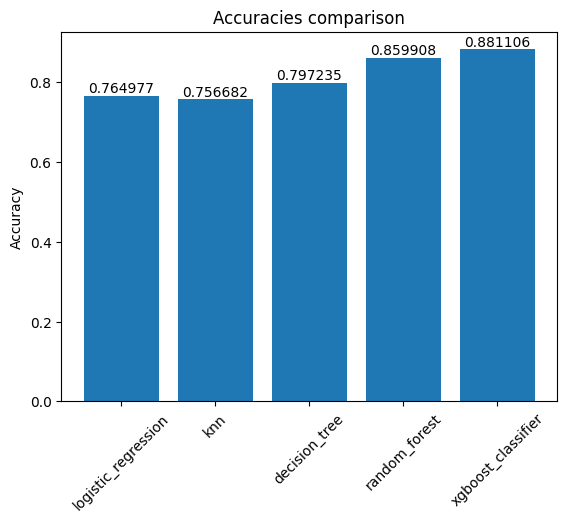

In [41]:
barplot_with_labels(accuracies, 'Accuracy', 'Accuracies comparison')

#### Confusion matrix

A **confusion matrix** is a specific table layout that allows visualization of the performance of a classification algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

We are going to plot the confusion matrix for each classifier to see which class is misleaded depending on the model.

<center>
<img src= https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png width=500>

##### Confusion matrix plot function

In [42]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

##### Confusion matrix computation

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix_classifiers = {
    "knn" : confusion_matrix(y_test, knn.predict(X_test)),
    "logistic_regression" : confusion_matrix(y_test, logistic_regression.predict(X_test)),
    "decision_tree" : confusion_matrix(y_test, decision_tree.predict(X_test)),
    "random_forest" : confusion_matrix(y_test, random_forest.predict(X_test)),
    "xgboost_classifier" : confusion_matrix(y_test_encoded, xgboost_classifier.predict(X_test)),
}


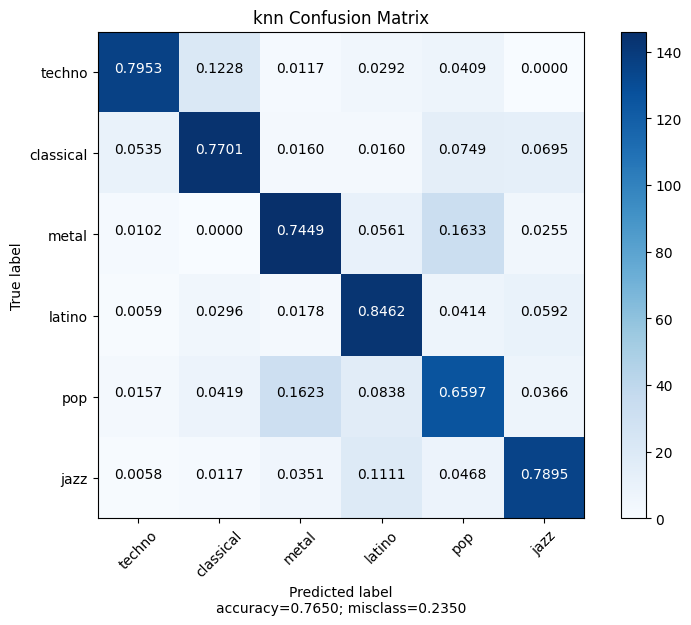

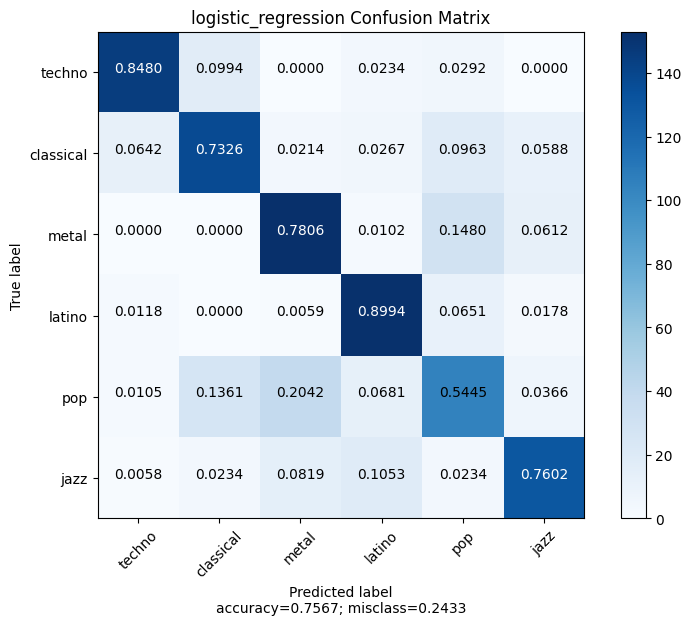

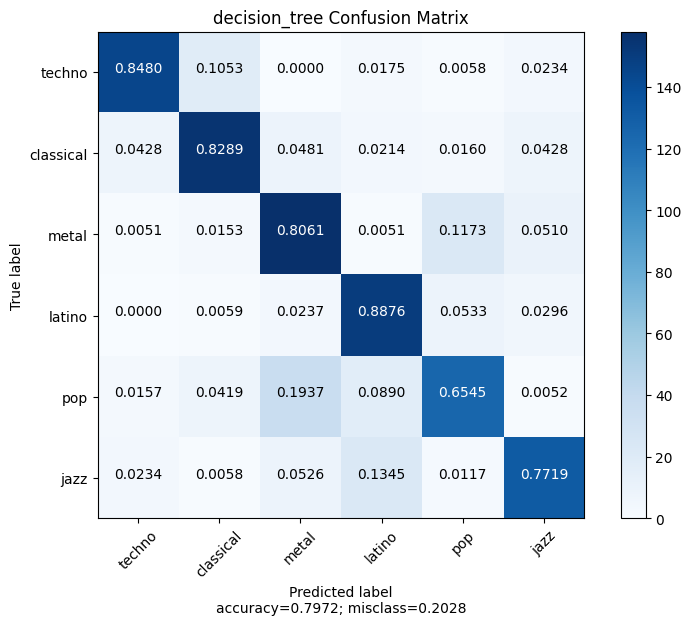

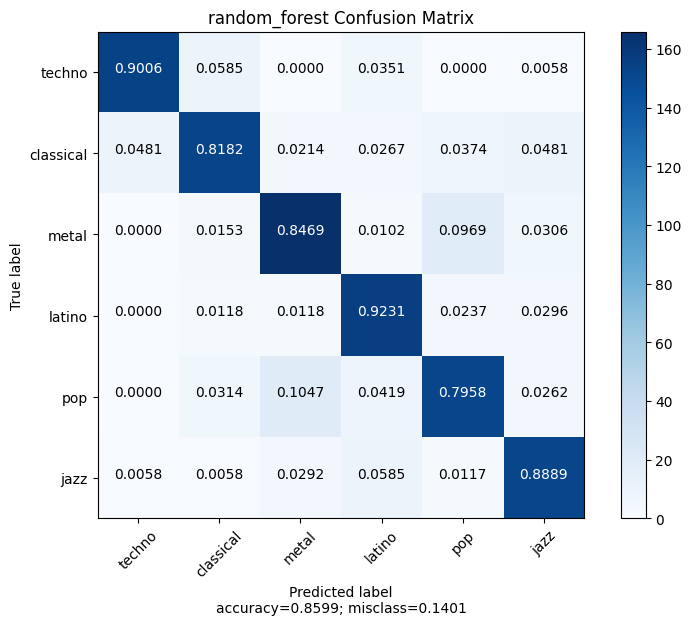

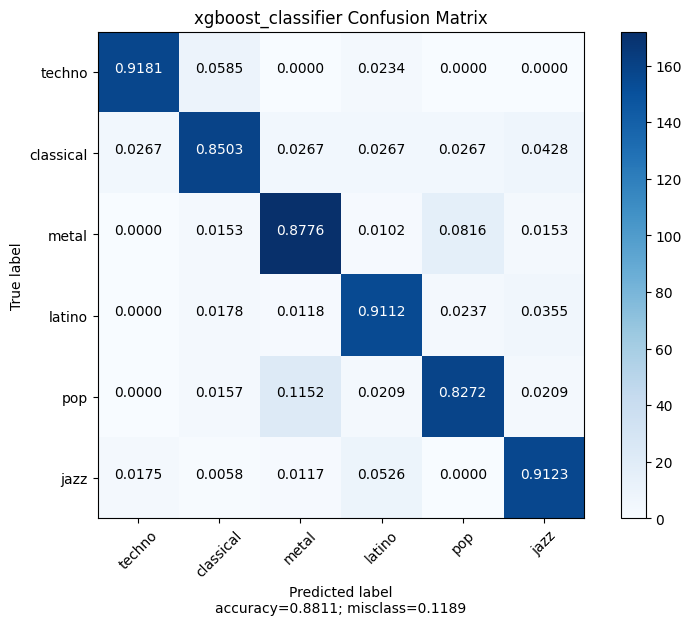

In [44]:
for classifier in confusion_matrix_classifiers:
    plot_confusion_matrix(confusion_matrix_classifiers[classifier], y_test.unique(), title=classifier + " Confusion Matrix")

#### Cross Validation

Cross-validation, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

<center>
<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

In [45]:
# We can leverage the cross_val_score function from sklearn
from sklearn.model_selection import cross_val_score

for classifier in classifiers:
    if classifier != 'xgboost_classifier':
        scores = cross_val_score(classifiers[classifier], X_train, y_train, cv=5)
        print(f"The mean accuracy of {classifier} is {scores.mean()} with a std of {scores.std()}")

The mean accuracy of knn is 0.75386097513009 with a std of 0.00540325943750303
The mean accuracy of logistic_regression is 0.7695315697436469 with a std of 0.006246224107782091
The mean accuracy of decision_tree is 0.7782891904389839 with a std of 0.006958563856767906
The mean accuracy of random_forest is 0.8483496244797729 with a std of 0.006102263843823762


Regarding theses accuracies, we can assess that random forest is the best model. XGBoost cross-validation can also be performed but is [slightly more tricky](https://xgboost.readthedocs.io/en/stable/python/examples/cross_validation.html), we can guess that XGBoost is still the best model.


#### Precision, Recall, F1-score

Precision, Recall and F1-score are metrics used to evaluate classifiers.
<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1024px-Precisionrecall.svg.png width=300>
</center>

$F_{1} score$ is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric, the closer to $1$ the better:

$$F_{1} = 2 \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$$

As our use case is a multi-class classification use case, these metrics have to be adpated. Therefore, in a multi-class setting :

$$Precision(class=a) = \frac{TP(class=a)}{TP(class=a)+FP(class=a)}$$
$$Recall(class=a) = \frac{TP(class=a)}{TP(class=a)+FN(class=a)}$$
$$F_{1}(class=a)= 2 \frac{\mathrm{Precision(class=a)} \cdot \mathrm{Recall(class=a)}}{\mathrm{Precision(class=a)} + \mathrm{Recall(class=a)}}$$
Then global $F_{1} score$ can bu computed as the average of $F_{1} scores$ for each class :
$$F_{1} = \frac{1}{C}\sum_{c=1}^{C}F_{1}(class=c)$$

In [46]:
from sklearn.metrics import f1_score
f1_scores = {}
for classifier in classifiers:
    if classifier == "xgboost_classifier":
        y_pred = classifiers[classifier].predict(X_test)
        f_score = f1_score(y_test_encoded, y_pred, average="macro")
    else:
        y_pred = classifiers[classifier].predict(X_test)
        f_score = f1_score(y_test, y_pred, average="macro")
    f1_scores[classifier] = f_score

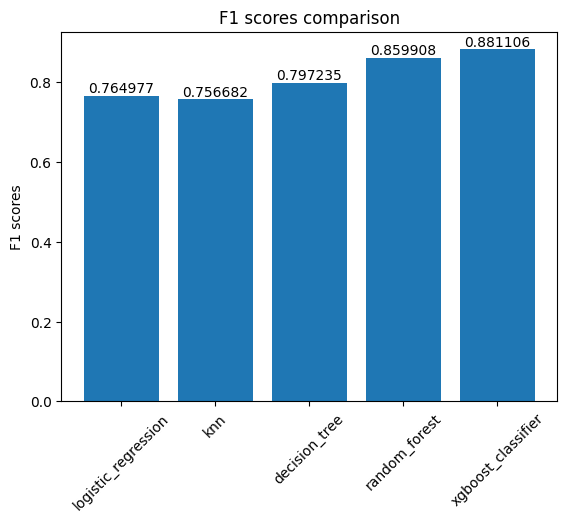

In [47]:
barplot_with_labels(f1_scores, 'F1 scores', 'F1 scores comparison')

In our specific use case, the evaluation regarding the $F_1$ score gives the same performance ranking

#### F1 Score limits

F1 score gives **equal importance to precision and recall**. In practice, **different types of mis-classifications incur different costs**.

In other words, the relative importance of precision and recall is an aspect of the problem.

Depending on if you are evaluating a classifier dedicated to medicine, to nuclear safety or to food quality testing, **the cost of false positive and false negative are not the same**



### Hyperparameter tuning

Machine Learning models often has several complex hyperparameters than can be tricky to choose relevantly.

**GridSearch** is an algorithm provided by scikit-learn that allows to empirically select the best hyperpameters in a set of provided hyperparameters for any estimator that has fit and predict functions.

See [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more information

##### Hyperparameter tuning of KNN classifier

In [48]:
from sklearn.model_selection import GridSearchCV

# Let's create a new KNN classifier using sklearn
knn_tuned = KNeighborsClassifier()

# List every hyperparameters to be tested
k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
weights = ["uniform", "distance"]
distances = ["euclidean", "cosine"]

param_grid = {
    "n_neighbors" : k_range,
    "weights" : weights,
    "metric" : distances
}

In [49]:
# Fitting the model for grid search
grid = GridSearchCV(knn_tuned, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [50]:
print("Best params are " + str(grid_search.best_params_))
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Best params are {'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for our training dataset with tuning is : 79.21%


In [51]:
knn_opti = KNeighborsClassifier(metric='cosine', n_neighbors=7, weights="distance")
knn_opti.fit(X_train, y_train)
print(f"Accuracy for our testing dataset with tuning is {knn_opti.score(X_test, y_test)}")

Accuracy for our testing dataset with tuning is 0.7944700460829494


GridSearch usage allowed us to improve significantly the accuracy of our KNN classifier

However, GridSearch is a very heavy algorithm, therefore it may be used wisely by smartly selecting the hyperparameters to be tested

## **Regression models to predict the popularity of a track** 📻

The second use case of today's session is to present regression models to predict the popularity of a track. Regression differs from classification as it consists in predicting a number instead of a class.

As for the classification part, we won't cover every models that exist. This part will also be shorter as the real challenge for regression is explainability and this will be covered in a next section.

In this section we will use and lightly deep dive into the following algorithms / models :

1. Linear Regression
2. KNN regressor
3. Decisiton Tree Regressor
4. Random Forest Regressor
5. XGBoost Regressor

As you can see, most of the models we used for classification have a regression setting. For this reason, the theoritical details of already covered algorithms will not be explained again.

### Dataset description reminder

As a reminder, here's the description of each column of the dataset that we are going to use for regression. <br>

| Column | Description |
| ------ | ------------ |
| **artists** | The artists' names who performed the track, this column is one hot encoded <br> into 7 columns, one for each 6 top artists and one for an other artists column |
| **popularity** | The popularity of a track is a value between 0 and 100. This is the target of our regression
| **duration_ms** | The track length in milliseconds |
| **explicit** | Whether or not the track has explicit lyrics, this column is one hot encoded <br> into 2 columns, for True and False respectively |
| **danceability** | Danceability describes how suitable a track is for dancing |
| **energy** | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of <br> intensity and activity
| **key** | The key the track is in. Integers map to pitches using standard Pitch Class notation, <br> this column is one hot encoded into 12 columns, one for each key|
| **loudness** | The overall loudness of a track in decibels (dB) |
| **mode** | Mode indicates the modality (major or minor) of a track (major=1, minor=0) |
| **speechiness** | Speechiness detects the presence of spoken words in a track |
| **acousticness** | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. |
| **instrumentalness** | Predicts whether a track contains no vocals |
| **liveness** | Detects the presence of an audience in the recording|
| **valence** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track |
| **tempo** | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology |
| **time_signature** | An estimated time signature. The time signature (meter) is a notational <br> convention to specify how many beats are in each measure. |
| **track_genre** | **The genre in which the track belongs, this column is one hot encoded <br> into 6 columns, one for each genre**|

#### Data Import

In [52]:
df_train_regression = pd.read_csv("CoursML_Regression_train.csv")
df_test_regression = pd.read_csv("CoursML_Regression_test.csv")

In [53]:
# Splitting into X and y variables
X_train_reg = df_train_regression.drop("popularity", axis=1)
y_train_reg = df_train_regression["popularity"]

X_test_reg = df_test_regression.drop("popularity", axis=1)
y_test_reg = df_test_regression["popularity"]

### **Linear Regression**

#### Model overview

Linear regression is a **linear approach** for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

Given a  data set $\{y_i,\, x_{i1}, \ldots, x_{ip}\}_{i=1}^n$ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y$ and the vector of regressors $x$ is linear. This relationship is modeled through an "error variable" $\epsilon$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form
 $$y_i = \beta_{0} + \beta_{1} x_{i1} + \cdots + \beta_{p} x_{ip} + \varepsilon_i
 = \mathbf{x}^\mathsf{T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, n, $$
where <sup>T</sup> denotes the transpose.

Often these $n$ equations are stacked together and written in matrix notation as
$$ \mathbf{y} = \mathbf{X} \boldsymbol\beta + \boldsymbol\varepsilon, \,$$

<center>
<img src=https://www.reneshbedre.com/assets/posts/reg/reg_front.svg width=500>

Without deepdiving too much into the maths, and because this is a model you probbably already know, here is the optimal linear estimator $\hat{\beta}$ obtained using the **least squares methods** :

$$\hat{\beta} = \left(X^\textsf{T}X\right)^{-1}X^\textsf{T}Y $$

#### Model execution

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Model performance

We are going to use the 2 following metrics to evaluate the quality of a linear regression :
- Mean squared error (MSE) : $\frac{1}{n} \sum_{i=1}^n \left(Y_i-\hat{Y_i}\right)^2$ is the average squared difference between the estimated values and the actual value. This value is not bounded, therefore can only measure the quality of one MSE by comparing it to other MSE.
- Determination coefficient : $R^2 = 1 - \frac{\sum_{i}e_{i}^2}{\sum_{i}(y_i - \bar{y})^2}$ is the proportion of the variation in the dependent variable that is predictable from the independent variable(s)

In [55]:
import sklearn.metrics as metrics

# Keep r2, MSE, beware of MSE

def regression_results(y_true, y_pred):
    # Regression metrics
    mse=metrics.mean_squared_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))


In [56]:
y_pred_reg = reg.predict(X_test_reg)
regression_results(y_test_reg, y_pred_reg)

r2:  0.2889
MSE:  646.4699


$R^2$ is really low, we can conclude that linear regression is not relevant for our use case, let's try other regression models

##### Precision error display

This plot shows how far the predictions of our model are from the real values, we can observe that our model is not good as the points are not close the $y=x$ line

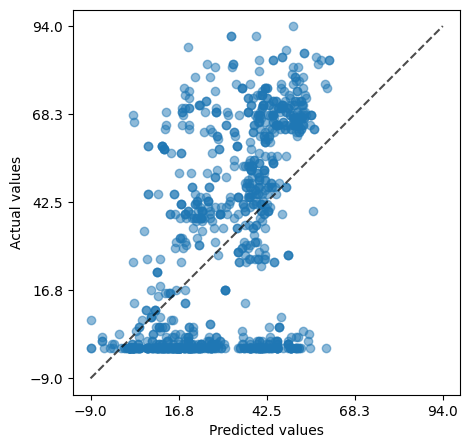

In [57]:
from sklearn.metrics import PredictionErrorDisplay
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test_reg, y_pred_reg, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)

#### Limits

Linear regression is a highly criticised model, mainly because **we can fit pretty much anything into a linear regression** and pretend to explain any variable with anything that linearly correlates with it. On one hand, a big risk is to mislead between correlation and causation. On another hand, there's also a high chance that the behaviour one tries to model is not linear.

<center>
<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/2560px-Anscombe%27s_quartet_3.svg.png width=500>
</center>

The ancombe's quartet is a famous dataset which shows how very different datasets can lead to exactly the same linear regression which is not even close to catch the right behaviour occuring in the data. Other takeways from this exemple are :
- Visualisation is very important to get an intuition of which model is the most relevant to use
- Statistical metrics such as mean, median, variance, etc. are not enough to describe a distribution

### **KNN Regressor**

#### Model overview

KNN regressor works the same as KNN Classifier, the only difference is that rather than classifying a datapoint with the same class as the k neirest neighbors, the simplest model takes the **average target value** of the k neirest neighbors to predict the target value of a new datapoint.

Like the KNN Classifier, more complex versions of the algorithm are using weighted distances and non euclidean metrics to compute the target value.

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=7, weights='distance')
knn_reg.fit(X_train_reg, y_train_reg)

,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
y_pred_reg = knn_reg.predict(X_test_reg)
regression_results(y_test_reg, y_pred_reg)

r2:  0.3838
MSE:  560.22


### **Decision Tree Regressor**

The decision tree regressor works exactly the same as the decision tree classifier, the **difference relies on the splitting criterion**, which is a measure of the error / the variance on each node.

 More precisely for each split, the **$MSE$** is computed, then the spitting value that minimises the **$MSE$** is chosen

#### Model execution

In [60]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=25)
decision_tree_regressor.fit(X_train_reg, y_train_reg)

,criterion,'squared_error'
,splitter,'best'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


#### Model performance

In [66]:
y_pred_reg = decision_tree_regressor.predict(X_test_reg)
regression_results(y_test_reg, y_pred_reg)

r2:  0.054
MSE:  860.0164


The performance of the decision tree regressor are really poor

### **Random Forest Regressor**

#### Model overview

Random Forest regression works the same as the Random Forest classifier but instead of a vote, a mean is computed.

In [62]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train_reg, y_train_reg)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Model performance

In [63]:
y_pred_reg = random_forest_reg.predict(X_test_reg)
regression_results(y_test_reg, y_pred_reg)

r2:  0.5142
MSE:  441.6347


Random forest performs better

### **XGBoost Regressor**

#### Model overview

Same as Random Forest, XGBoost regression works the same as XGBoost classifier it computes the mean of every tree instead of outputing the majority vote.

In [64]:
from xgboost import XGBRegressor

y_train_reg_encoded = label_encoder.fit_transform(y_train_reg)
y_test_reg_encoded = label_encoder.fit_transform(y_test_reg)

xgboost_regressor = XGBRegressor()
xgboost_regressor.fit(X_train_reg, y_train_reg_encoded)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Model performance

In [65]:
y_pred_reg = xgboost_regressor.predict(X_test_reg)
regression_results(y_test_reg_encoded, y_pred_reg)

r2:  0.4455
MSE:  460.4129


## Time Series bibliography


**A time series is a sequence of data points collected or recorded over a period of time, typically with equal intervals between each point.**

Time series modeling involves the use of statistical and mathematical techniques to analyze and predict patterns within a sequence of data points collected or recorded over time. The goal is to understand the underlying structure of the data, make predictions about future values, and gain insights into the temporal behavior of the phenomena represented by the time series. It is widely used in various fields, including finance, economics, signal processing, and environmental science.

Books:

- "Time Series Analysis and Its Applications: With R Examples" by Robert H. Shumway and David S. Stoffer
- "Forecasting: Principles and Practice" by Rob J Hyndman and George Athanasopoulos
- "Introduction to Time Series and Forecasting" by Peter J. Brockwell and Richard A. Davis

Online Courses:

- [Practical Time Series Analysis on Coursera by State University of New York](https://www.coursera.org/learn/practical-time-series-analysis)

Papers:

- "A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)" by Aarshay Jain. [Link to the article](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- "Time Series Forecasting – ARIMA, LSTM, Prophet with Python" by Aman Dalmia. [Link to the article](https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887)

Documentation and Tutorials:

- [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html) for time series analysis in Python.
- [Prophet Documentation](https://facebook.github.io/prophet/) for forecasting time series data.

<font size='5'>The course ends here, thank you for listening ! </font><br>